In [4]:
from scipy.io.wavfile import read
from scipy import signal
from scipy.ndimage import maximum_filter
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
from pydub.generators import SignalGenerator

file = "test.wav"
audio_segment = AudioSegment.from_file(file)
if audio_segment.frame_rate != 44100:
    Fs, sample = read(audio_segment.set_frame_rate(44100).set_channels(1).export(format="wav"))
else:
    Fs, sample = read(audio_segment.set_channels(1).export(format="wav"))



In [5]:

# window_length_seconds = 3
# window_length_samples = int(window_length_seconds * Fs)
# window_length_samples += window_length_samples % 2

# frequencies, times, stft = signal.stft(sample, Fs, nperseg=window_length_samples, nfft=window_length_samples, return_onesided=True)
# print(stft)
# plt.pcolormesh(stft, shading='gouraud')
# plt.show

(44100,)


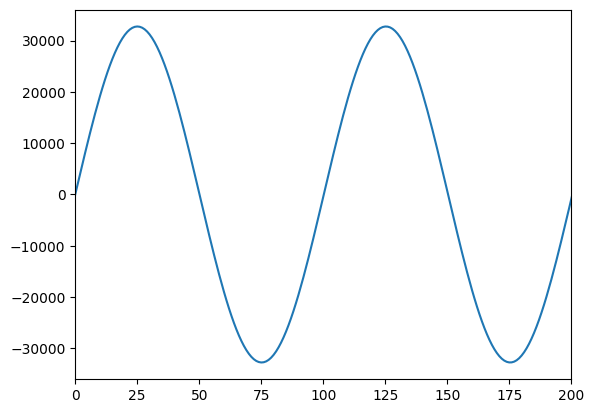

In [43]:
from pydub.generators import Sine
frame_rate, sample = read(Sine(freq=440).to_audio_segment(1000).export(format="wav"))
print(sample.shape)
plt.plot(sample)
plt.xlim(0, 200)
plt.show()


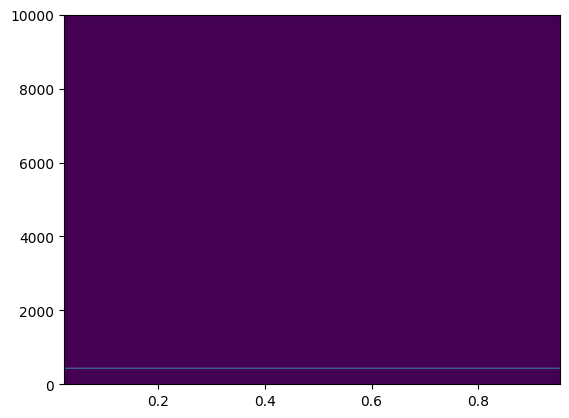

In [41]:

from matplotlib import mlab
import functions

framerate = 44100
window_size = 2**12
overlap = int((2**12)*0.5)

f, t, spec = signal.spectrogram(sample, fs=frame_rate, nperseg=window_size, window="hamming", noverlap=overlap)
plt.pcolormesh(t, f, spec)
plt.ylim(0, 10000)
plt.show()

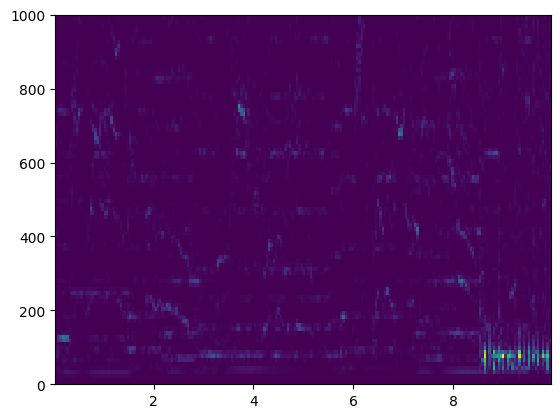

In [58]:
from matplotlib import mlab
from scipy.io.wavfile import read
from scipy import signal
import functions

window_size = 2**12
overlap = int((2**12)*0.5)

frame_rate, sample = read(AudioSegment.from_file("11. Armageddon.mp3",start_second=10, duration=10).set_frame_rate(44100).set_channels(1).export(format="wav"))
f, t, spec = signal.spectrogram(sample, fs=frame_rate, nperseg=window_size, window="hamming", noverlap=overlap)
plt.pcolormesh(t, f, spec)
plt.ylim(0, 1000)
plt.show()